# Electric Motor Temperature - Understanding the Data

##### Note before starting:
##### DO NOT re-run this file. If you need to re-run this file, make sure that KB_DataScience file is saved in the same folder as this file and has been run. If this doesn't happen, this file will most likely not work when re-run. Also please ignore warning messages -- I can't seem to get rid of them!!

In [1]:
# Importing packages and functions from DS python file
from ipynb.fs.defs import functions as ds
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.4f}'.format)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = ds.get_data()

## What does the data contain?

The data contains the following measurements:

 - profile_id = Measurement session id. Each distinct measurement session can be identified by this integer
 - u_q = Voltage of the q-component (in V)
 - u_d = Voltage of the d-component (in V)
 - i_q = Current q-component
 - i_d = Current d-component
 - torque = Motor torque (in Nm)
 - motor_speed = Motor speed (in RPM)
 - ambient = Ambient temperature (in Celsius)
 - coolant = coolant temperature (in Celsius)
 - pm = Permanent magnet temperature (in Celsius) measured with thermocouples and transmitted wirelessly via a thermography unit
 - stator_yoke = Stator yoke temperature (in Celsius) measured with thermocouples
 - stator_winding = Stator winding temperature (in Celsius) measured with thermocouples
 - stator_tooth = Stator tooth temperature (in Celsius) measured with thermocouples
 
The profile_id is the session ID, and therefore is just an identifier of each session with each row containing a set of measurements during the session. The rows are already in time order with each row occuring every 0.5 seconds. We have 2 electrical components, d and q, which we have the voltage and current measurements for. We also have the torque and the motor speed measurements as well as the ambient air and coolant temperatures.

The data set provides us with 4 major temperature measurements; Permanent Magnet, Stator Yoke, Stator Winding, and Stator Tooth. As the electricity flows through the Stator Windings, heating up the wires and activating the Pernament Magnet and therefore turning the motor, temperature control is key to gaining the most performance without damage or loss of a motor. 

For convenience, I have added in a time column that counts sequentially for every 0.5 second measurement. I have also created a column for the power output of each electrical component by using the formula P=VxI.

## Quick data facts:

In [3]:
ds.describe_data(df)

,profile_id,time,u_q,u_d,i_q,i_d,q_power,d_power,torque,motor_speed,ambient,coolant,pm,stator_yoke,stator_winding,stator_tooth
count,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000,1330816.0000
mean,40.7931,12000.9218,54.2790,-25.1338,37.4128,-68.7168,1523.4055,3563.8200,31.1060,2202.0807,24.5653,36.2300,58.5068,48.1880,66.3427,56.8786
std,25.0455,8966.0877,44.1732,63.0920,92.1819,64.9332,4553.9201,9495.3487,77.1358,1859.6634,1.9295,21.7861,19.0015,19.9910,28.6721,22.9522
min,2.0000,0.0000,-25.2909,-131.5304,-293.4268,-278.0036,-12400.8559,-35914.8275,-246.4667,-275.5491,8.7835,10.6238,20.8570,18.0767,18.5858,18.1340
25%,17.0000,4918.0000,12.0699,-78.6909,1.0959,-115.4061,-0.7945,-2.9494,-0.1374,317.1107,23.1848,18.6981,43.1516,31.9903,42.7880,38.4160
50%,43.0000,10209.0000,48.9382,-7.4298,15.7740,-51.0938,474.7617,252.2117,10.8604,1999.9767,24.7973,26.9001,60.2663,45.6255,65.1101,56.0363
75%,65.0000,16897.0000,90.0344,1.4703,100.6121,-2.9797,4313.6702,5690.6048,91.5972,3760.6391,26.2170,49.8575,72.0084,61.4608,88.1411,75.5867
max,81.0000,43970.0000,133.0370,131.4698,301.7079,0.0519,13626.0678,35222.5597,261.0057,6000.0151,30.7142,101.5985,113.6066,101.1480,141.3629,111.9464


What can we see in the table above?
1. We have just under 740 hours of data. The average session took 6 hours and 40 minutes with the longest session taking just over 24 hours. 
2. All three of the components prone to temperature (Permanent Magnet and the Stators) reached temperatures of over 100 degrees, however the mean and median temperatures hovered between 48 and 66 degrees.
3. Even though the temperature of the motor increased to high levels, the ambient temperature did not increase significantly and instead we can see that the spread of data for ambient is very centralised around the mean of 24.5 degrees.
4. Component electrical power has a very large spread and may not be useful in analysis, especially as we already have the breakdown.
5. The current in component d only flows in one direction and never reverses unlike component q which flips which way the electricity is flowing. This may be down to DC versus AC but I would need the SME to help identify why this is the case. This question may also help with the voltage too.

In the table above we see percentiles but it's a little hard to visualise, and therefore I present boxplots and histograms to best show the spread of each variable. I have also added two new variables which are the absolute values of the electrical components. This is because we have negative values but any non-zero measurement is expected to produce heat and therefore we should take into account absolute values.

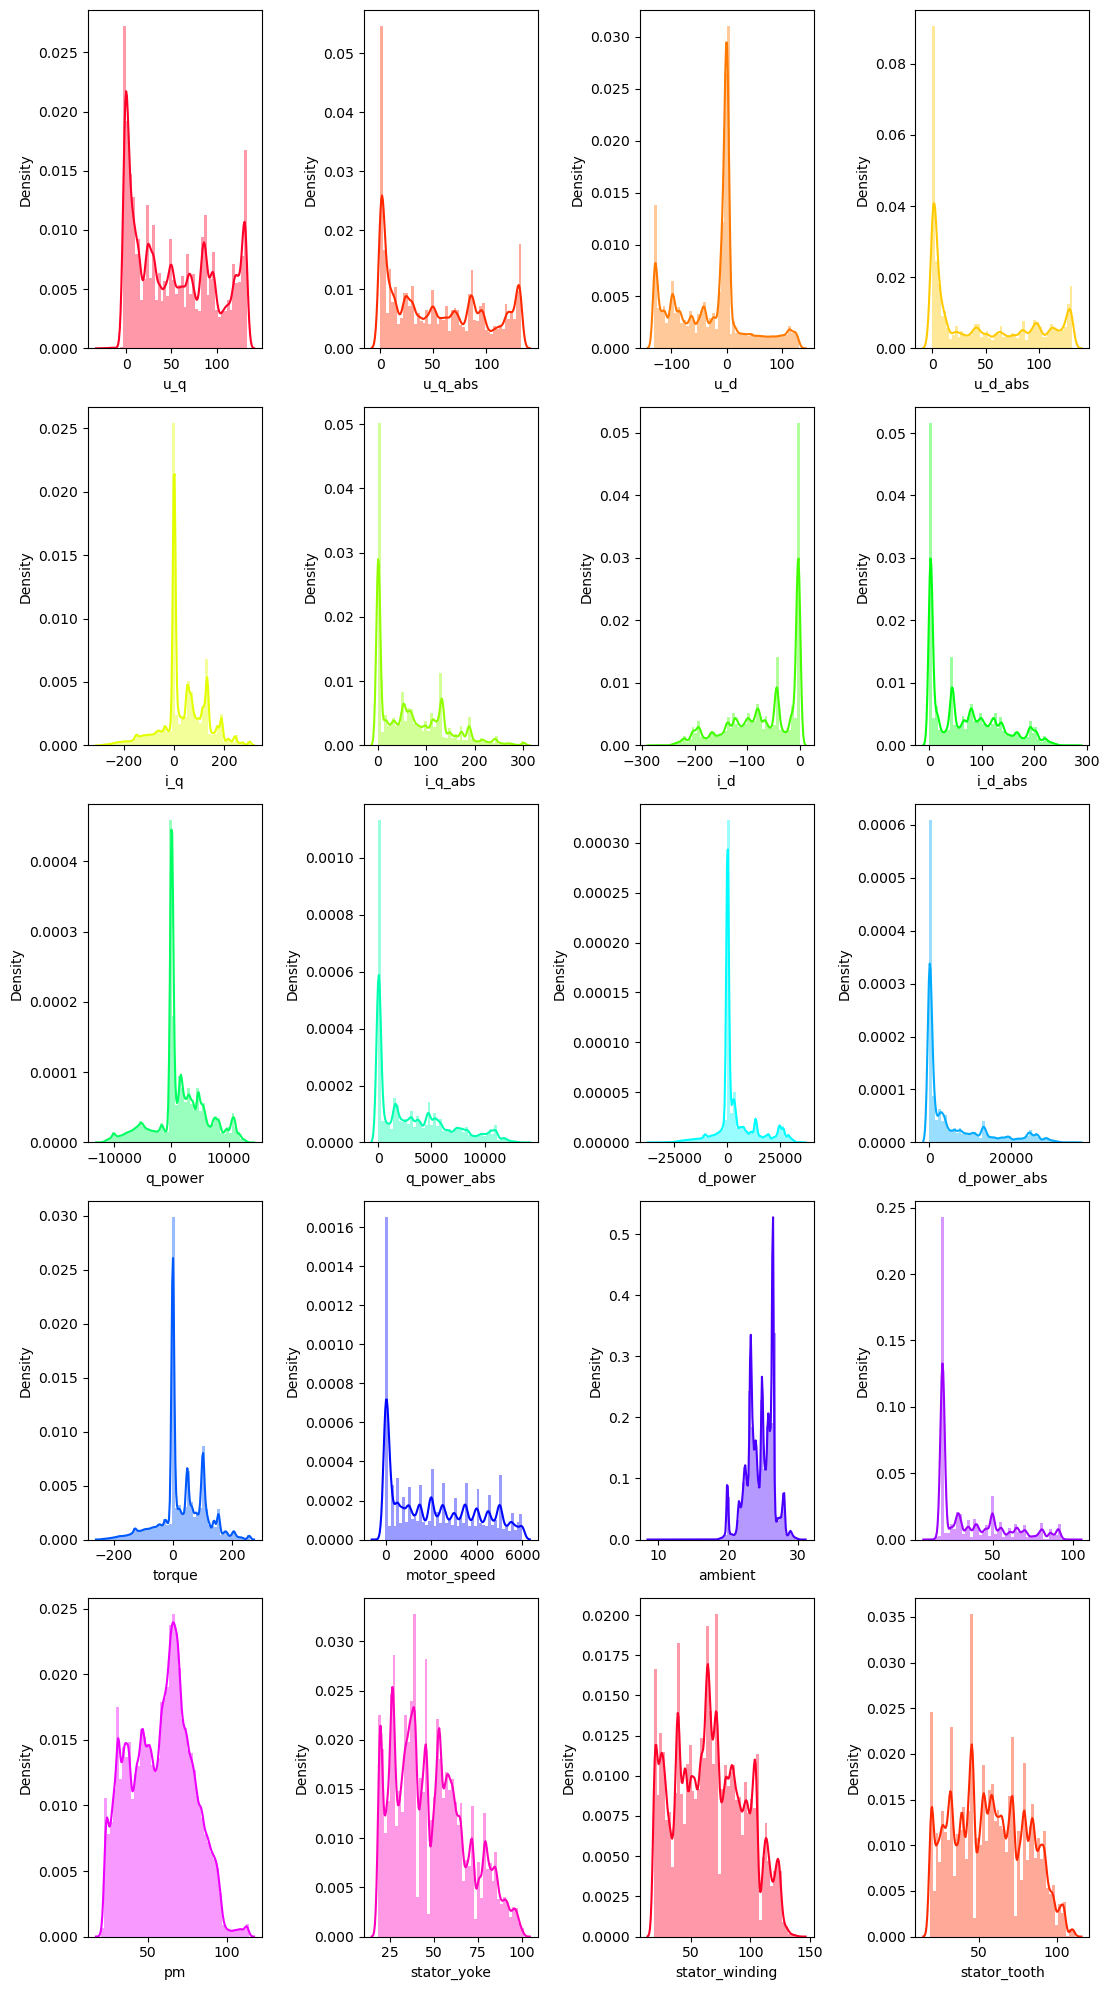

In [4]:
df = ds.add_absolute_values(df)
ds.histplots(df)

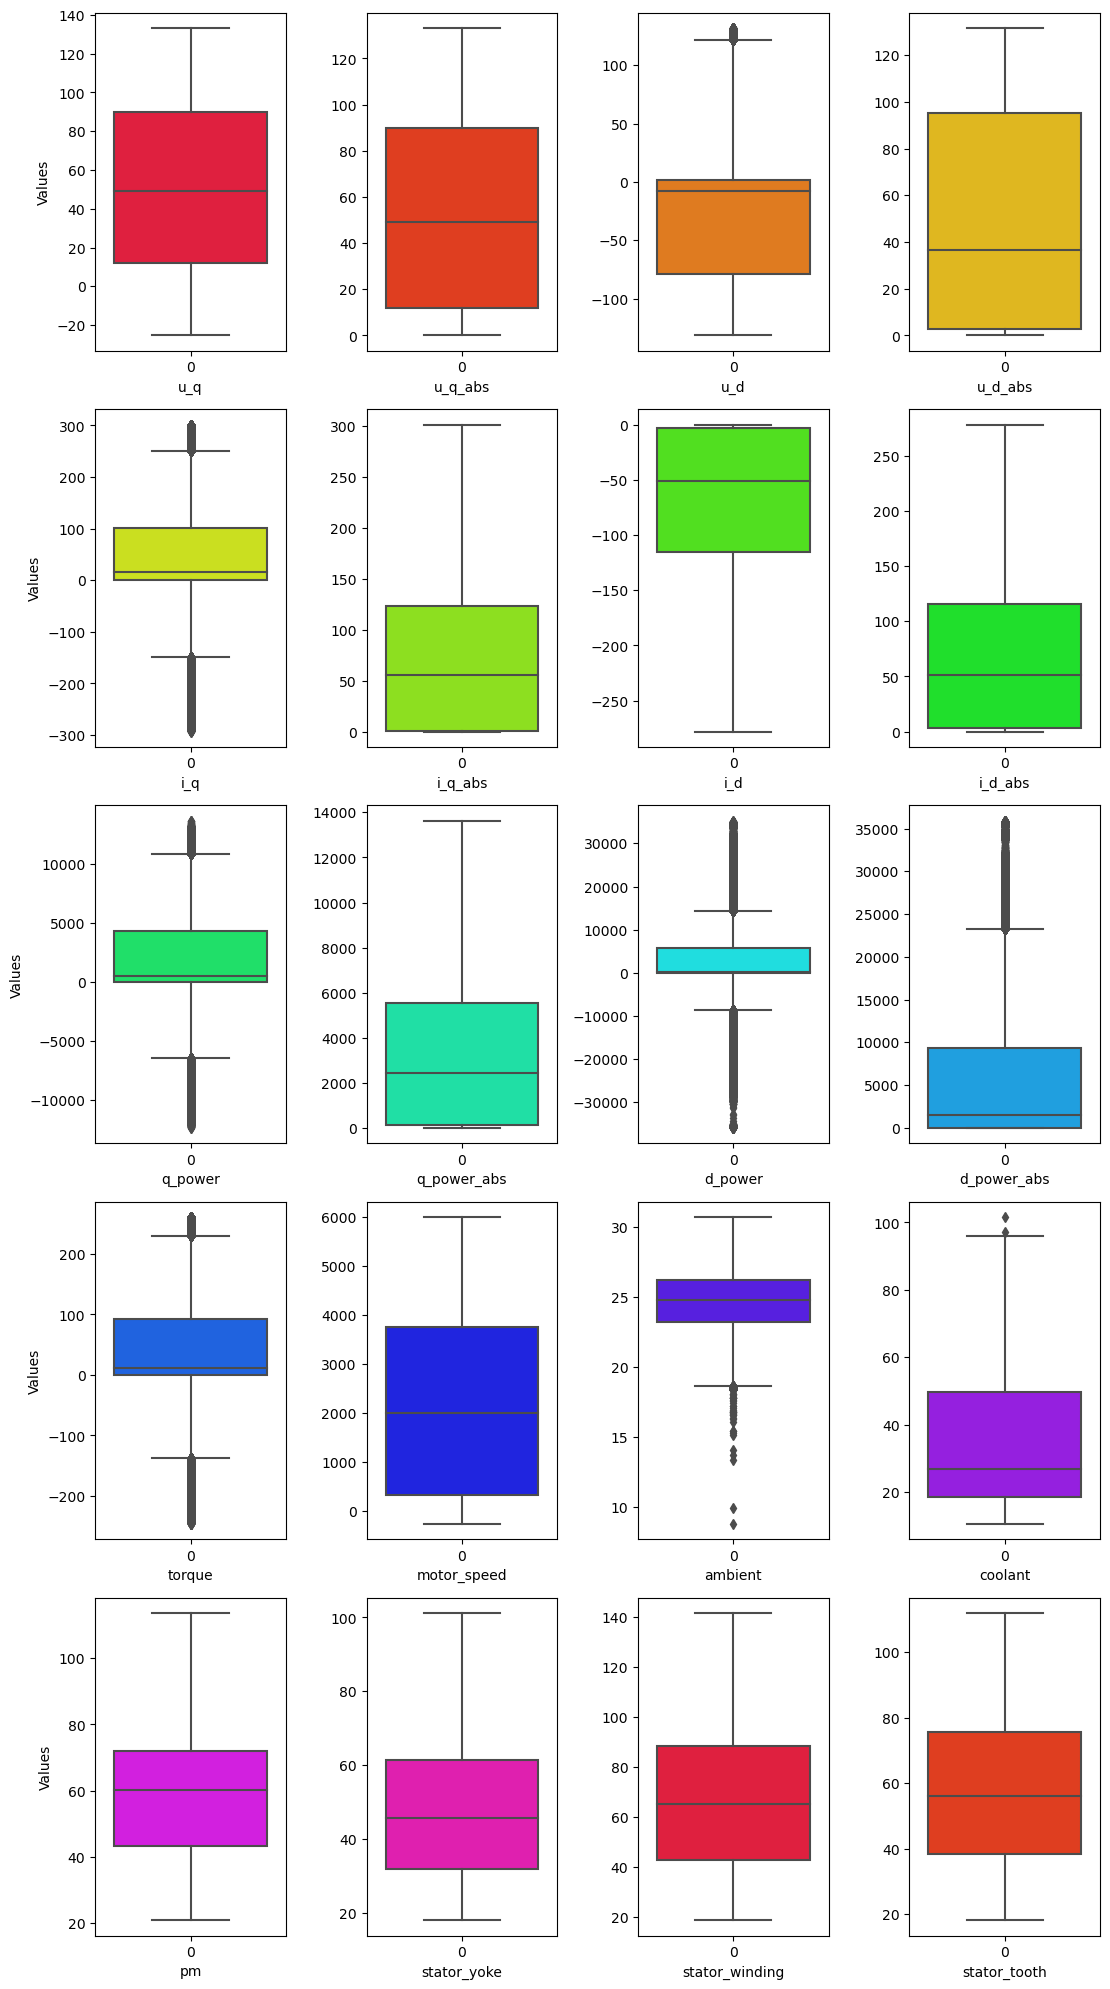

In [5]:
ds.boxplots(df)

What can we tell by the boxplots and histograms?
1. The big one is that the current of the q component (i_q) has an almost identical distribution and boxplot with the torque measurement. Therefore, there is a very good chance the the current of the q component directly controls the torque of the motor.
2. All of the temperature (pm and stators) boxplots and histograms look very similar and therefore could be all related to each other. This is kind of expected as the makeup of a motor puts all of these components very close to each other. 
3. Coolant has a few outliers that are a lot higher than the rest of the data.
4. There are a lot of spikes in the distributions for the electrical components and for the Torque and Motor Speed with major ones occuring at 0. This is most likely due to the nature of the sessions where no inputs were given in order to cool the temperature of the motor down or to test specific things that are unavailable to me at this time.
5. Unlike point 4, the temperatures histograms are more fluid and evenly distributed. This is most likely due to the nature of temperature dissapating slowly when there is no electrical input and slowly increases when there is.

Next we look at the correlation between all of the variables to see how much they interact with each other.

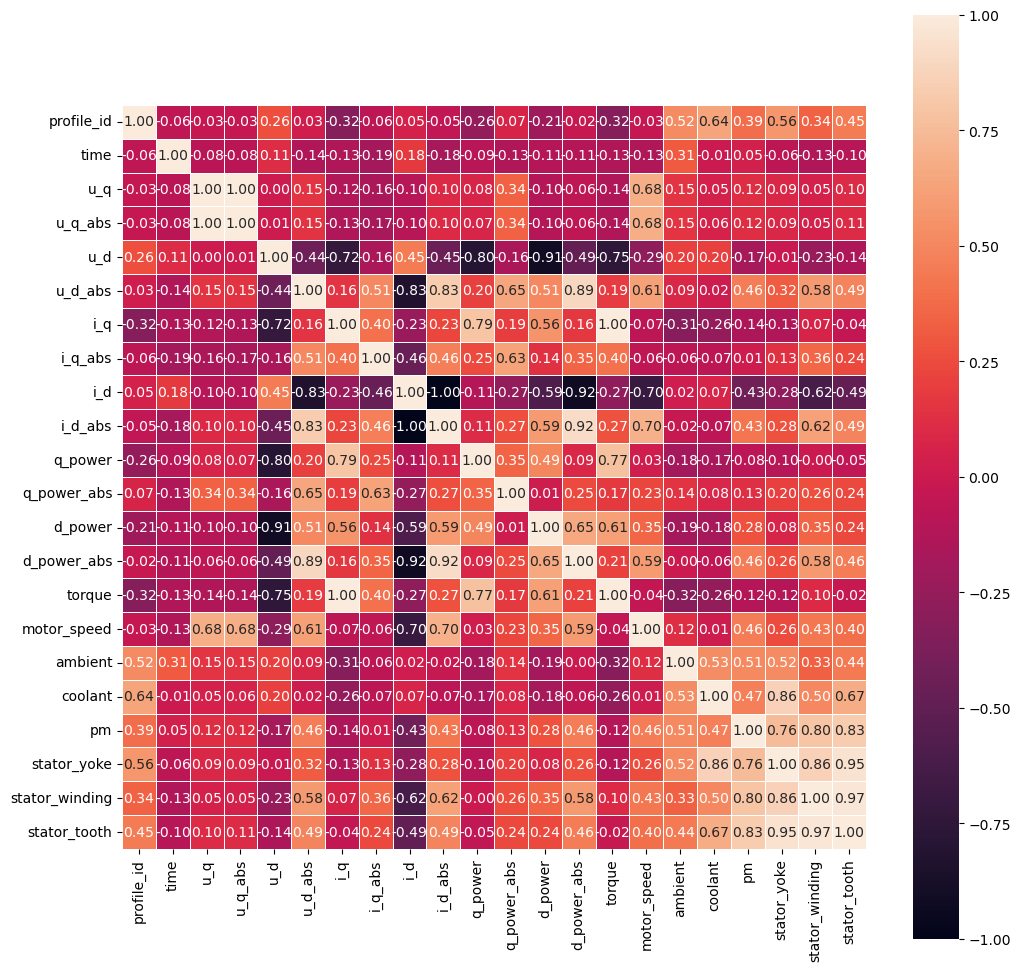

In [6]:
ds.correlation_matrix(df)

What does this tell us?
1. We were correct to think that the current of the q component directly affected the torque of the motor, because it does. It has a perfect positive correlation. 
2. Ambient and Coolant temperatures are highly correlated to the motor temperatures, with coolant most correlated to the Stator yoke. Ambient may be explained by the way the motor temperatures were measured where the ambient temperature affected the measurements of the motor temperature. Coolant could be explained by the design of the motor.
3. Motor Speed has a strong positive impact on the motor temperature, whereas torque has a much less impact on the motor temperature.
4. Motor Speed appears to be affected significantly by the current of the d component and voltage of the q component.
5. Creating a variable that looks at the absolute values of the electrical components has increased the correlation between the electrical components and the temperature of the motor.

If I were to look at the motor temperatures and their correlation to the independent variables in order to build a Machine Learning Model I would be interested in the following variables:

- For a model to predict the Permanent Magnet temperature:
    u_d_abs, i_d or i_d_abs, d_power_abs, motor_speed, ambient, coolant
- For a model to predict the Stator Yoke temperature:
    u_d_abs, i_d or i_d_abs, q_power_abs, d_power_abs, motor_speed, ambient, coolant
- For a model to predict the Stator Winding temperature:
    u_d_abs, i_q_abs, i_d or i_d_abs, q_power_abs, d_power_abs, motor_speed, ambient, coolant
- For a model to predict the Stator Tooth temperature:
    u_d_abs, i_q_abs, i_d or i_d_abs, q_power_abs, d_power_abs, motor_speed, ambient, coolant

A thing to note is that although I name these variables as something that is interesting for building a model, there may be unmentioned variables that actually have a good predicting impact on modeling. And these named variables may be bad predictors because they may have high multi-colinearity with other modeling variables.

## Charting the impact of independent variables against Motor Temperature

In this section, I will be walking you through some of the charts that show how over a single session, the independent variables affected the temperature of the motor. Firstly, let's look at how the temperature of the Permanent Magnet and the Stators performed across session 20.

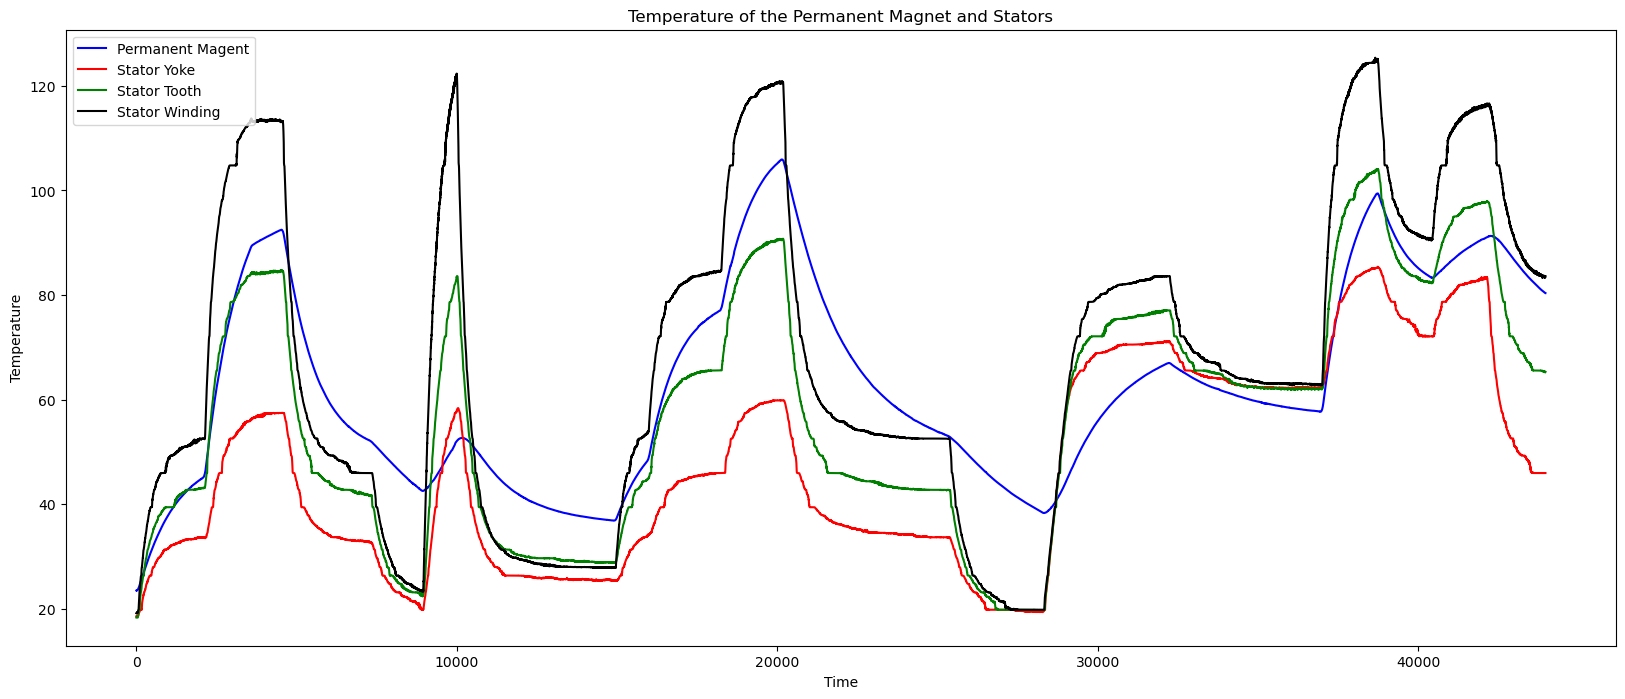

In [7]:
ds.temp_plot(df)

We can see that the temperatures are all following each other as to be expected with them all being in close proximity to each other. Stator Windings increase temperature first and peak first as the electricity to power the motor runs through the component. As the windings have electricity running through them, this exites the permanent magnet and heats this component up next as can be seen on the chart. What is interesting is that this component takes longer to cool down than the stator components. Stator Tooth heats up next and is the third highest as it is next closest in proximity to the windings with finally the yoke heating up last and not as high. 

Next we compare some of the independent variables against the motor temperatures.

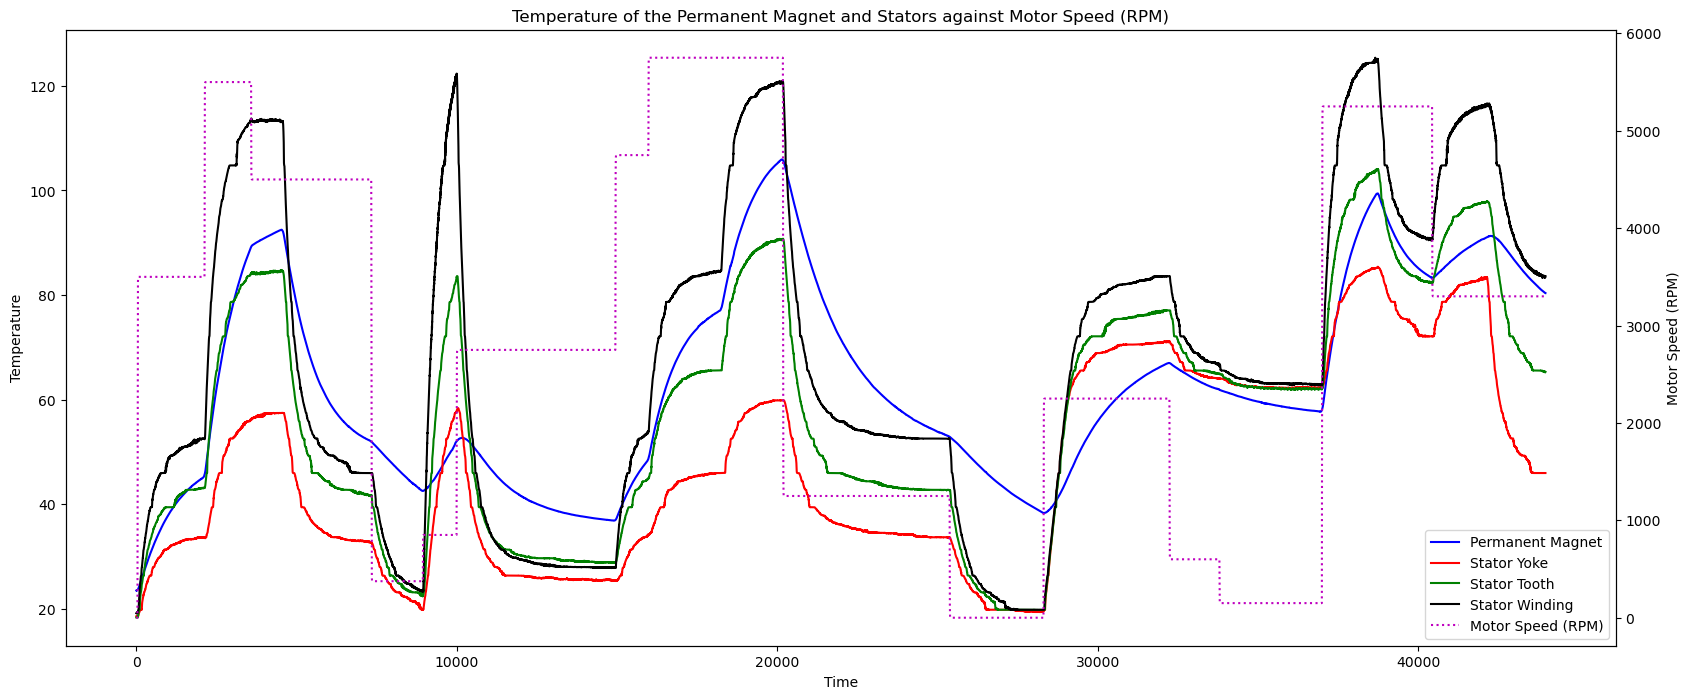

In [8]:
session_df = ds.sessiondf(df)
ds.plot_temp_against_var(session_df, 'motor_speed', 'Motor Speed (RPM)')

We can see that the Motor Speed follows the pattern of the motor temperatures quite well and the peak RPM occurs before the peak of the motor temperatures. We can then infer that there is a lag between motor speed and motor temperatures. 

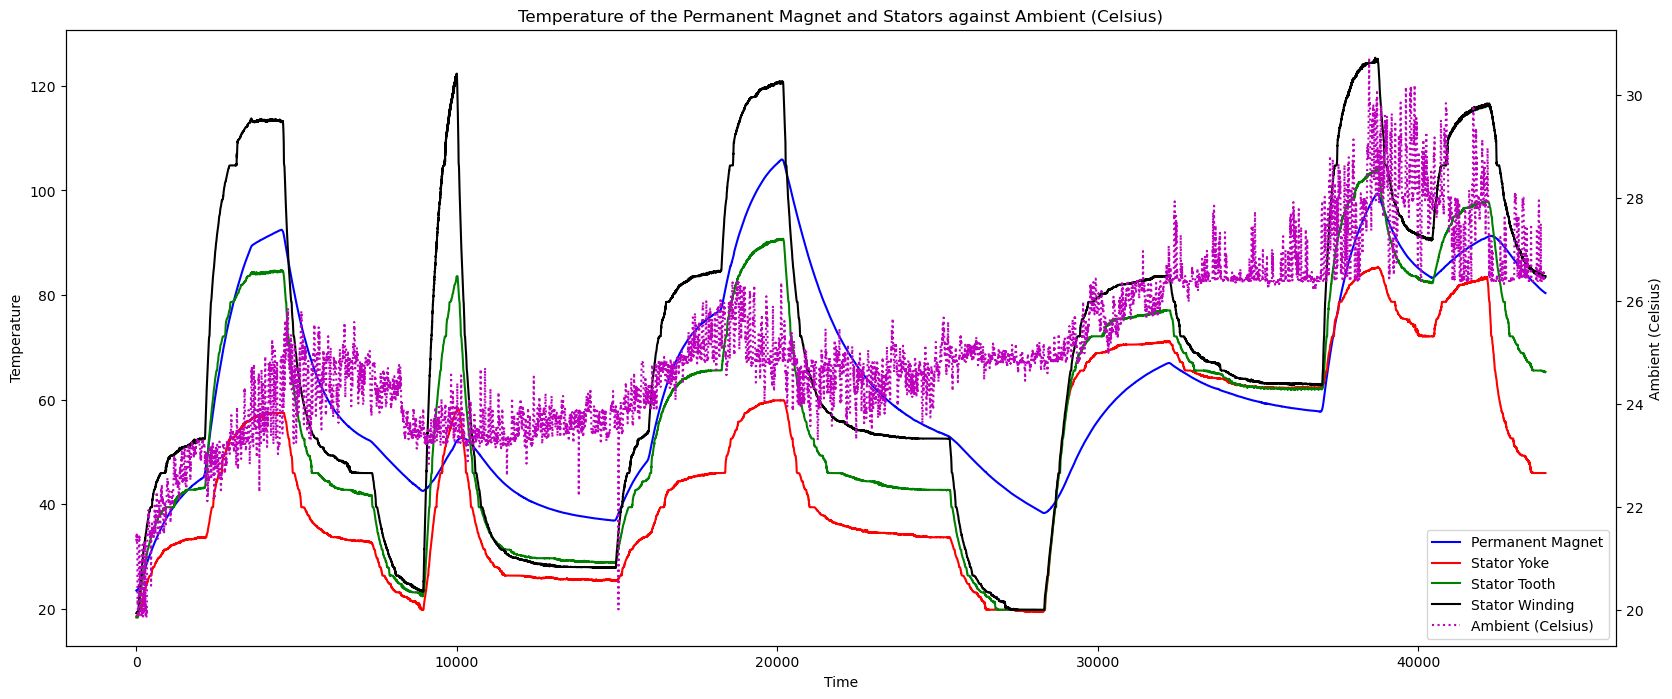

In [9]:
ds.plot_temp_against_var(session_df, 'ambient', 'Ambient (Celsius)')

In this chart, we can see that the Ambient temperature measurement does correlate positively with the motor temperatures, however there is no significant impact on the motor temperature that could be caused by the ambient temperature.

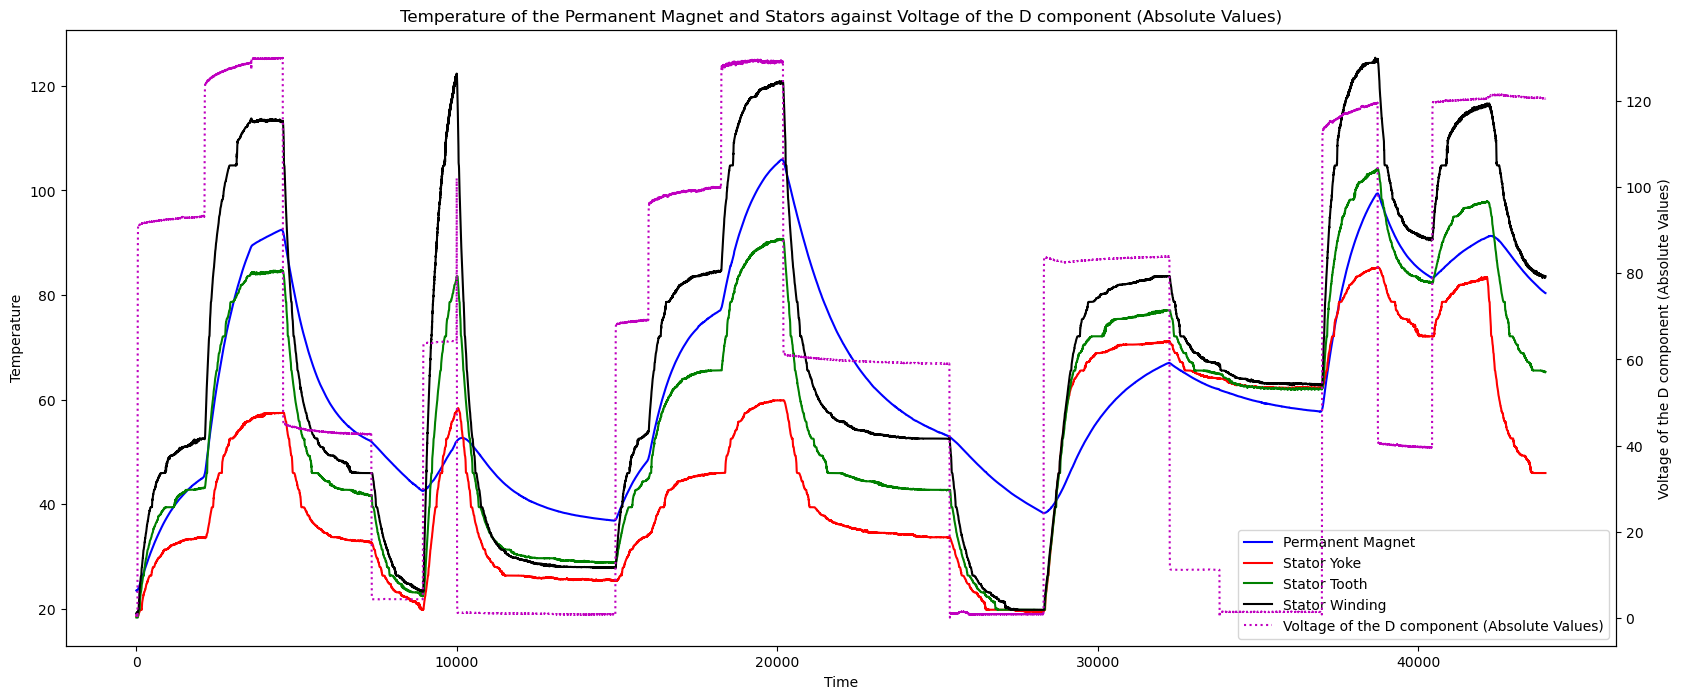

In [10]:
ds.plot_temp_against_var(session_df, 'u_d_abs', 'Voltage of the D component (Absolute Values)')

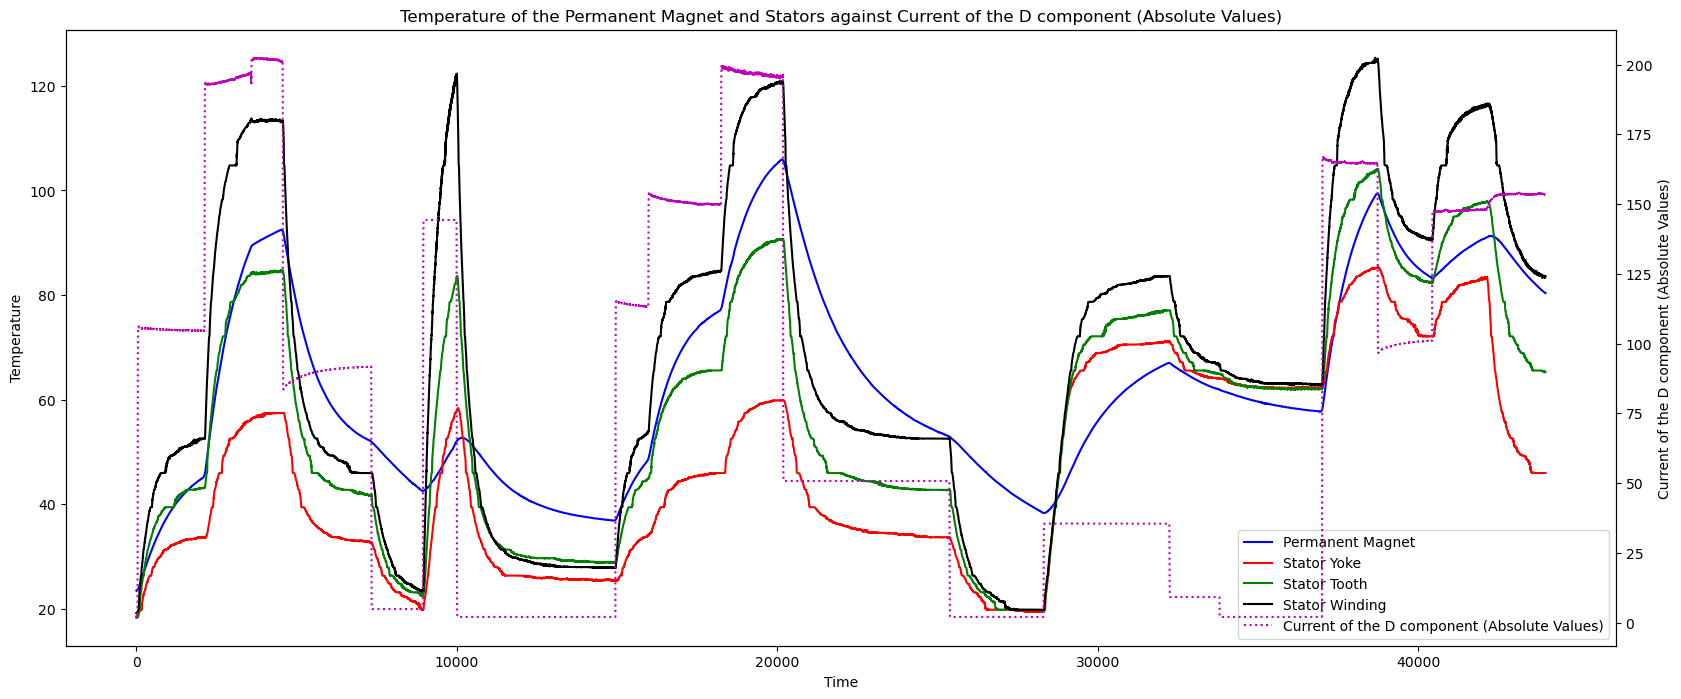

In [11]:
ds.plot_temp_against_var(session_df, 'i_d_abs', 'Current of the D component (Absolute Values)')

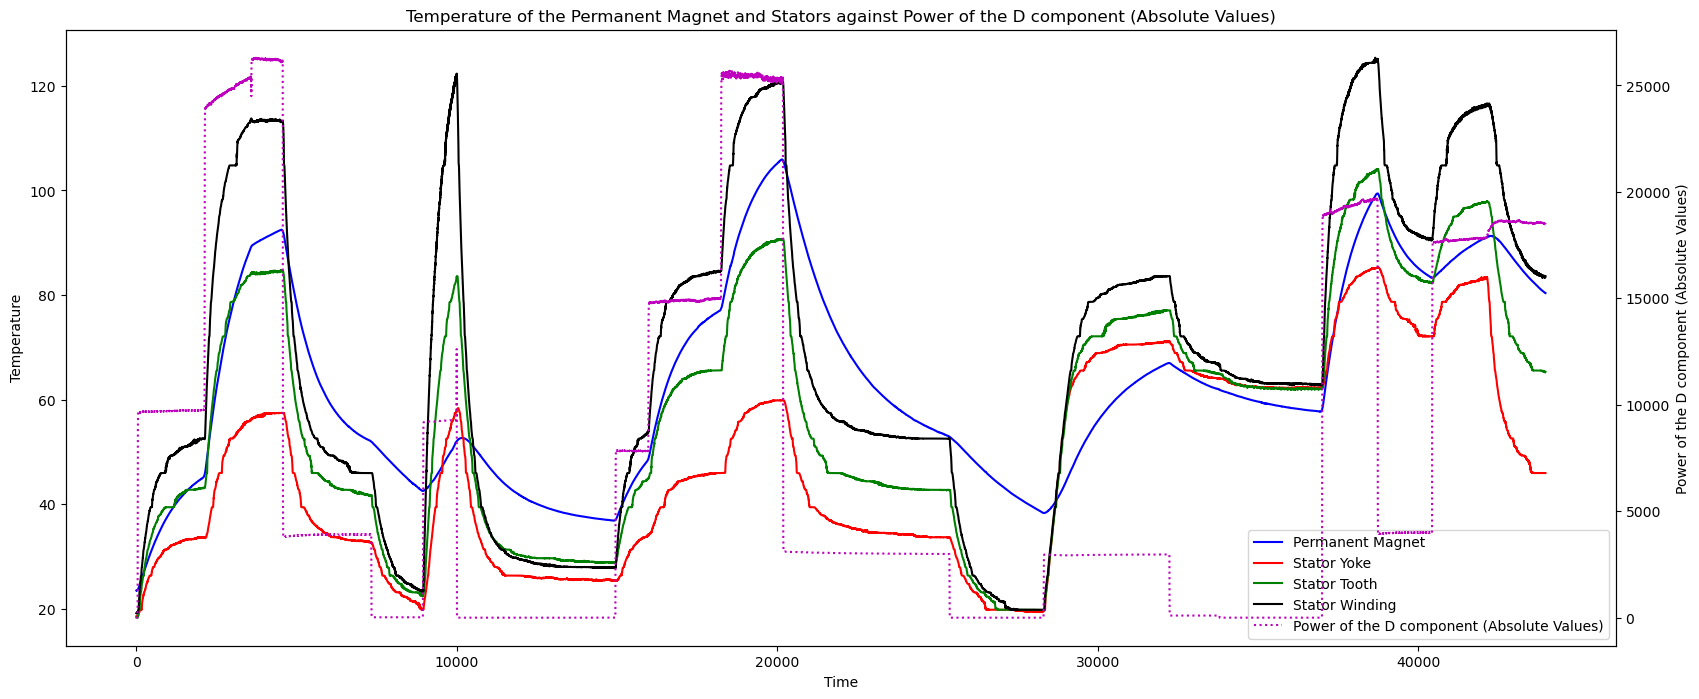

In [12]:
ds.plot_temp_against_var(session_df, 'd_power_abs', 'Power of the D component (Absolute Values)')

3 similar charts there plotting all parts of the D electrical component; Volts, Current, and Power. They follow a similar trend to the motor speed one above. Therefore a similar inference can be made, however, we have a large peak at Time=10000 where the Power is not as high as we expect to cause such a large temperature peak. The same can be said around Time=30000 too. Let's check if it's as a result of the Q component.

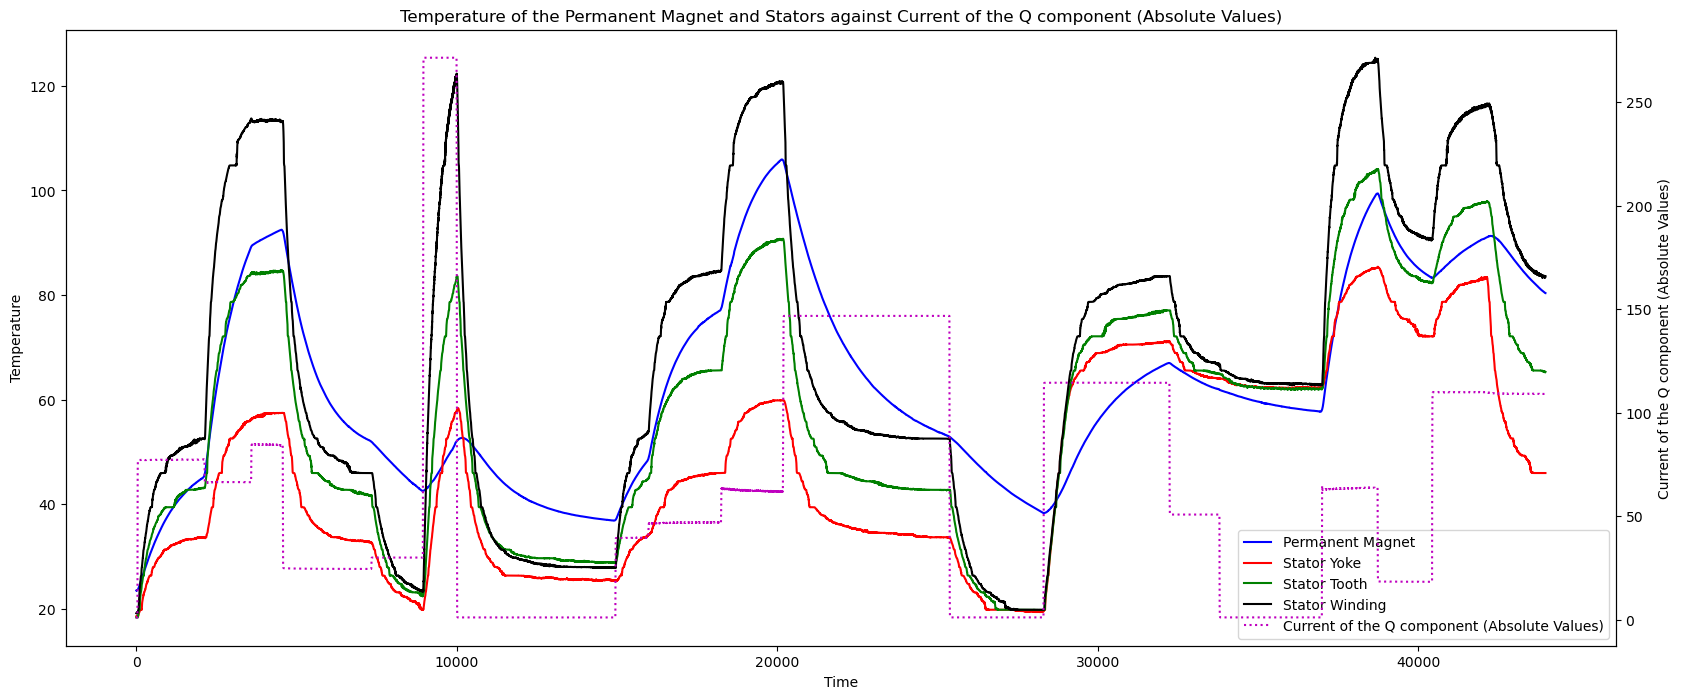

In [13]:
ds.plot_temp_against_var(session_df, 'i_q_abs', 'Current of the Q component (Absolute Values)')

As we can see, the Q component has a massive current spike at Time=10000 and a decent spike at Time=30000. We can also observe both D and Q components having a joint impact around the Time=20000 to Time=30000. Therefore, if we are to build a model. We should encompass a mixture of D and Q component measurements.

## Proof of Concept - Temperature Model Building

This next part is a proof of concept that this dataset is able to create a machine learning model that would help the business. I will be predicting only the stator Yoke temperature.

### Variable Selection

To make the following models easy to understand, I will be using the variables that were given as part of the dataset and not any of the additional power, or absolute values that I created previously. I will also not be using Torque as that is directly correlated to the current of component Q.

The final statistics for these variables are as follows:

In [14]:
x,y = ds.x_y_split(df)
x = x[['u_q', 'u_d', 'i_q', 'i_d','motor_speed','ambient', 'coolant']]
print(ds.vif(x))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [15]:
ds.ols(x,y)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:            stator_yoke   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.225e+06
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:47:10   Log-Likelihood:            -4.5387e+06
No. Observations:             1330816   AIC:                         9.077e+06
Df Residuals:                 1330808   BIC:                         9.077e+06
Df Model:                           7                                         
Covariance Type:            nonrobust  

The first set of statistics is a multicolinearity test to ensure that the independent variables in the models are not highly correlated with each other. I use a Variance Influation Factor (VIF) measures the strength between the input variables. We have three variables that are highly correlated, Motor Speed, Q voltage and D current. I have decided to keep these variables because the dataset does not contain enough features to offset them with, without causing other issues.

The second set is a detailed view of an Ordinary Least Squares Regression Result. We can see that R-Squared is reasonably high which is good however the current of component Q is supposidly not that significant. I have kept it for the same reasons as the VIF scoring.

### Modeling

I will be creating 2 models; Linear Regression and a Random Forest Regression. Linear Regression is best described as a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

A Random Forest Regresson is an estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [16]:
linear_model, linear_score = ds.linear_model(df)
linear_model

LinearRegression()

In [17]:
rfr_model, rfr_score = ds.randomforestregression(df)
rfr_model

RandomForestRegressor(n_estimators=10, random_state=42)

### Performance of the Models

In [18]:
linear_score

0.8653140841948961

The Linear Regression has an R-Squared of 0.865 which means that this model can explain 86.5% of the dataset. This is rather good as there is some infuencers/multicolinearity in this dataset as was shown above. One of the assumptions of Linear Regression is that there is low multicolinearity between the independent variables.

In [19]:
rfr_score

0.9931952292160277

The Random Forest Regression model has an R-Squared of 0.993 which means that this model can explain over 99% of the dataset. This is extremely good however because this number is so high, it is a little suspect and would need to make sure that we aren't accidently overfitting the model.

### Prediction Examples

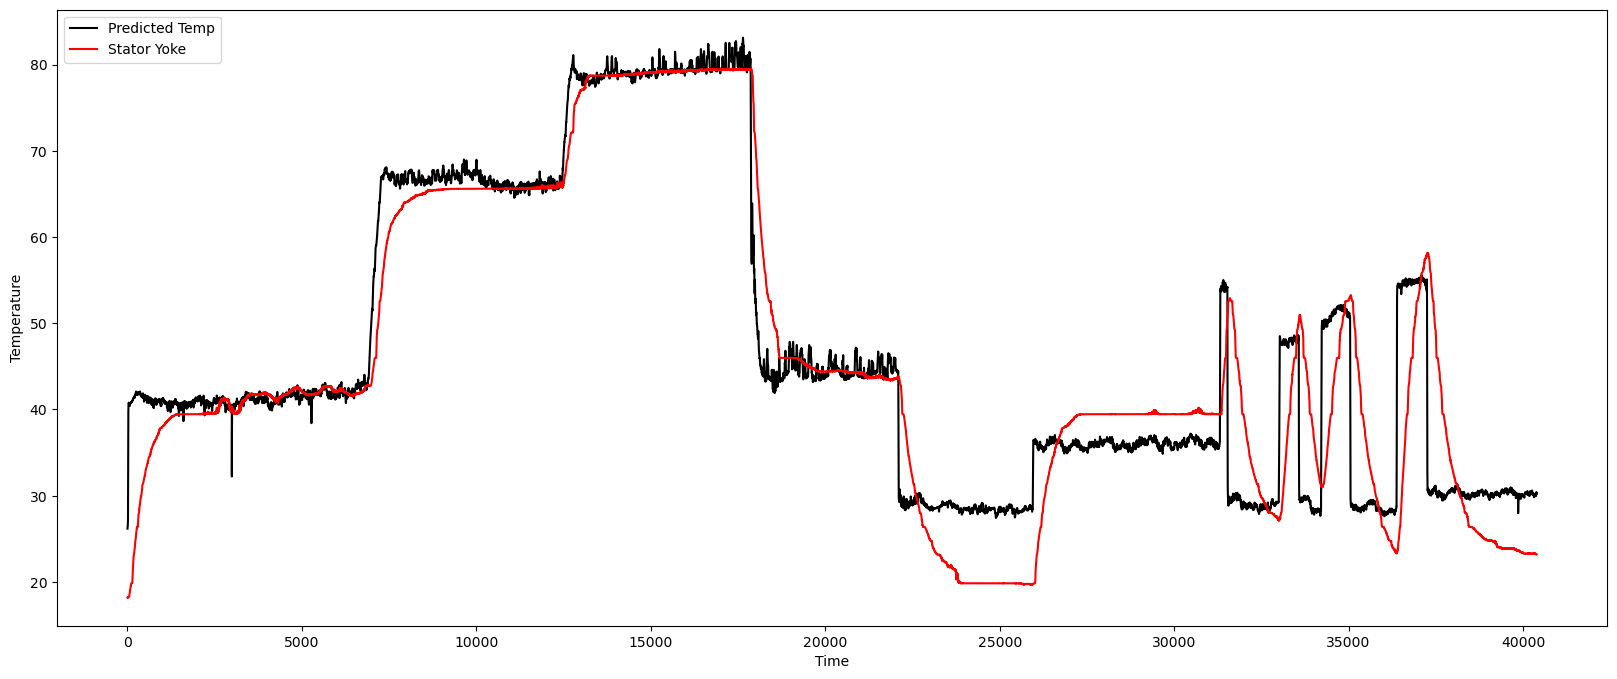

In [20]:
ds.linear_example(df,linear_model)

The above chart showcases session id 6 where the black line is our predicted Stator Yoke Temperature and the red line is the actual temperature. We can see that the predictions follow the actual temperature quite nicely however, the predictions appear to be preempting the actual temperatures, this could come in handy. The one flaw with this is that the lower session id's are much more gentle with electrical inputs than the later sessions and this model does not cope that well with sessions with eratic inputs. However, the Random Forest Regressor does:

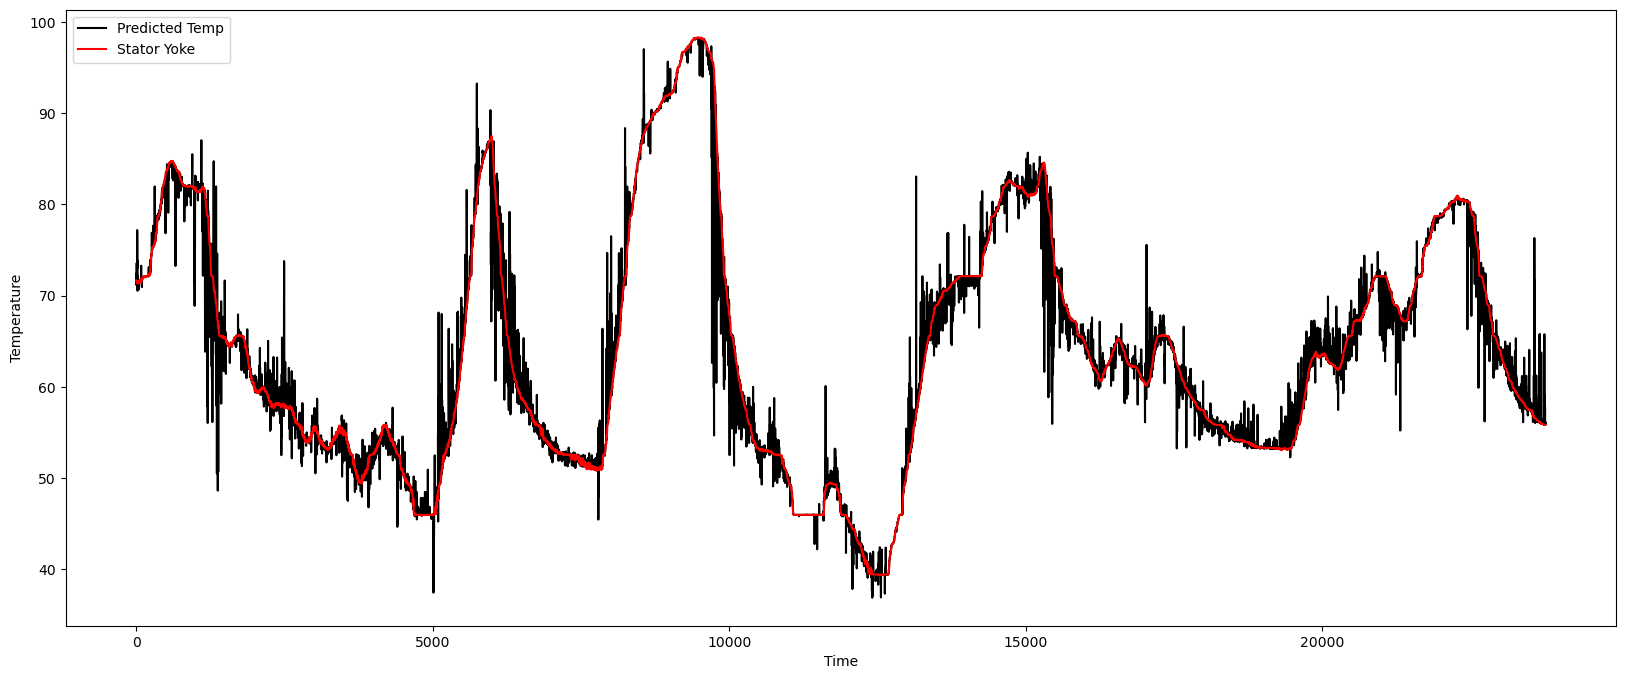

In [21]:
ds.random_forest_example(df,rfr_model)

This is session 74. There are a lot more erratic inputs here and the model has coped very well with. The predictions follow the actual temperatures very well. There are a few spikey outliers that could be resolved with some tweaks to the model, but overall this model performs exceptionally.

### Business Benefits

These models can both have a significant business benefit. When in a basic input session, having the Linear Regression model to pre-empt the high temperatures means that the model can forewarn the tester that a high temperature is about to happen, and therefore the tester can take action in order to avoid overheating. This will save on replacement costs.

The Random Forest Regression Model can be used to heighten performance of the motor without overheating. As this model follows the temperature measurements in real time, we can tune the performance of the motor by having an aggressive input strategy to simulate road conditions better, and therefore we would know how the motor will react in the real world.